## Setting up data

In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans

## Reading Wine dataset & exploring data

In [13]:
wine = pd.read_csv('./wine-clustering.csv')
pd.set_option('precision', 2) #Setting dataframe precision
pd.set_option('display.max_rows', 50) #Setting max rows to display

print(f"The original data shape is {wine.shape}")

The original data shape is (178, 13)


### Visualize the dataset

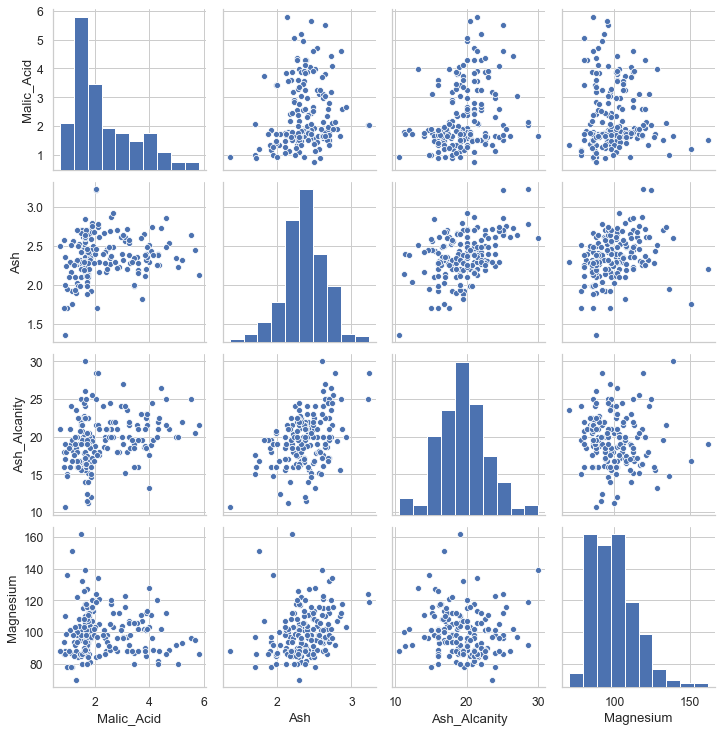

In [14]:
%matplotlib inline

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=wine, vars=wine.columns[1:5])

## Create a TSNE Estimator to reduce the data down to two dimensions

In [15]:
tsne = TSNE(n_components=2, random_state=13)
reduced_wine = tsne.fit_transform(wine)

print(f'Reduced data shape: reduced_digits.shape = {reduced_wine.shape}')

Reduced data shape: reduced_digits.shape = (178, 2)


#### Visualize the reduced data

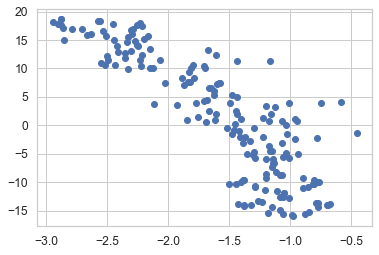

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

dots = plt.scatter(reduced_wine[:, 0], reduced_wine[:, 1])

## PCA Analysis

In [17]:
pca = PCA(n_components=2, random_state=13)  # reduce to two components
pca.fit(wine)
reduced_pca = pca.transform(wine)

reduced_df = pd.DataFrame(reduced_pca, columns = ['Component 1', 'Component 2'])
reduced_df['Alcohol'] = wine.Alcohol

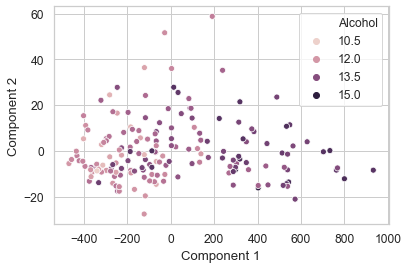

In [18]:
axes = sns.scatterplot(data=reduced_df, hue = 'Alcohol' ,x='Component 1', y='Component 2') 

## K-Means Clustering

### Create a k-means estimator and fit the model

In [19]:
kmeans = KMeans(n_clusters=3, random_state=11)  # find three clusters
kmeans.fit(wine)

KMeans(n_clusters=3, random_state=11)

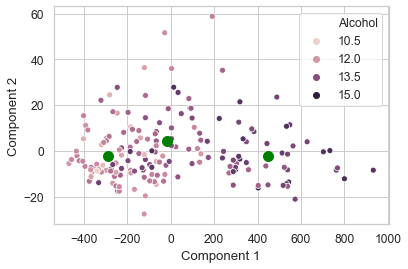

In [20]:
final = sns.scatterplot(data=reduced_df, hue = 'Alcohol' , x='Component 1', y='Component 2') 

data_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(data_centers[:,0], data_centers[:,1], s=100, c='Green')

In [21]:
print(data_centers)

[[-288.75258647   -2.23889973]
 [ 448.29677492   -2.2569996 ]
 [ -18.48419282    4.20263004]]
